#**Purpose of this Analysis**


The dataset consists of customer information over the last 70 months for a telecommunications company. The purpose of this analysis is to determine the key features that lead to customer churn. Using the historical information will alow us to build a model to predict if the features a customer has, along with certain household characteristcis, will determine if we will retain this customer's business or risk not retaning the customer's business.

#**The Data and cleaning**

Below I begin by buidling the environment and loading the Kaggle data set from my github. I then do some very brief analysis to verify the data set is clean and ready for EDA.

After reviewing some of the data I noticed even though the TotalCharges column should show all numerical data, the data in that row is showing the data type as an object instead of int or float. I proceed to verify if there are null values below.

There are in fact no null values, so it must mean there column contains data not as type float or int leading to the whole row reading as an integer. I then sort by the values in TotalCharges to see what comes up. It seems as though we have blank spaces in this column. These need to be counted and dealt with. There are only 11 rows with the blank space listed. I opt to drop these rows in the next line below.

With the spaces now dropped, the column is ready to be converted to a float. I proceed with doing so in the next step with no further issues.

Next I would like an idea of the unique vallues listed in each column. Outside of the columns for customerID, tenure, MonthlyCharges, and TotalCharges, I can see the values we will be working with while also verifying no formating or spelling issues.




In [1]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from numpy import inf
from scipy.stats.mstats import winsorize
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
capstone2 = pd.read_csv('https://raw.githubusercontent.com/r4geqwit/Capstone2/master/WA_Fn-UseC_-Telco-Customer-Churn.xlsx%20-%20WA_Fn-UseC_-Telco-Customer-Chur.csv')
capstone2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
capstone2.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [4]:
capstone2.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
capstone2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
capstone2.sort_values(by=['TotalCharges'])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6646,8249-THVEC,Male,0,Yes,Yes,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,997.75,No
5598,6051-PTVNS,Female,0,Yes,Yes,55,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.15,998.1,No
3686,5899-MQZZL,Female,0,No,No,13,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.00,999.45,Yes
3353,4536-PLEQY,Male,0,Yes,No,12,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.05,999.8,No


In [7]:
capstone2.drop(capstone2[capstone2['TotalCharges'] == ' '].index, inplace = True)

In [8]:
capstone2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [9]:
capstone2['TotalCharges'] = capstone2['TotalCharges'].astype(np.float)

In [10]:
capstone2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [11]:
for col in capstone2:
  print(capstone2[col].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


#**Data Exploration I**

In this section I perform some indepth analysis of the figures to become more aquainted with the dataset I am working with.

In [12]:
capstone2.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,2018-QKYGT,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


In [13]:
capstone2["winsorized_tenure"] = winsorize(capstone2["tenure"], (0, 0.10))
capstone2["winsorized_MonthlyCharges"] = winsorize(capstone2["MonthlyCharges"], (0, 0.10))
capstone2["winsorized_TotalCharges"] = winsorize(capstone2["TotalCharges"], (0, 0.10))


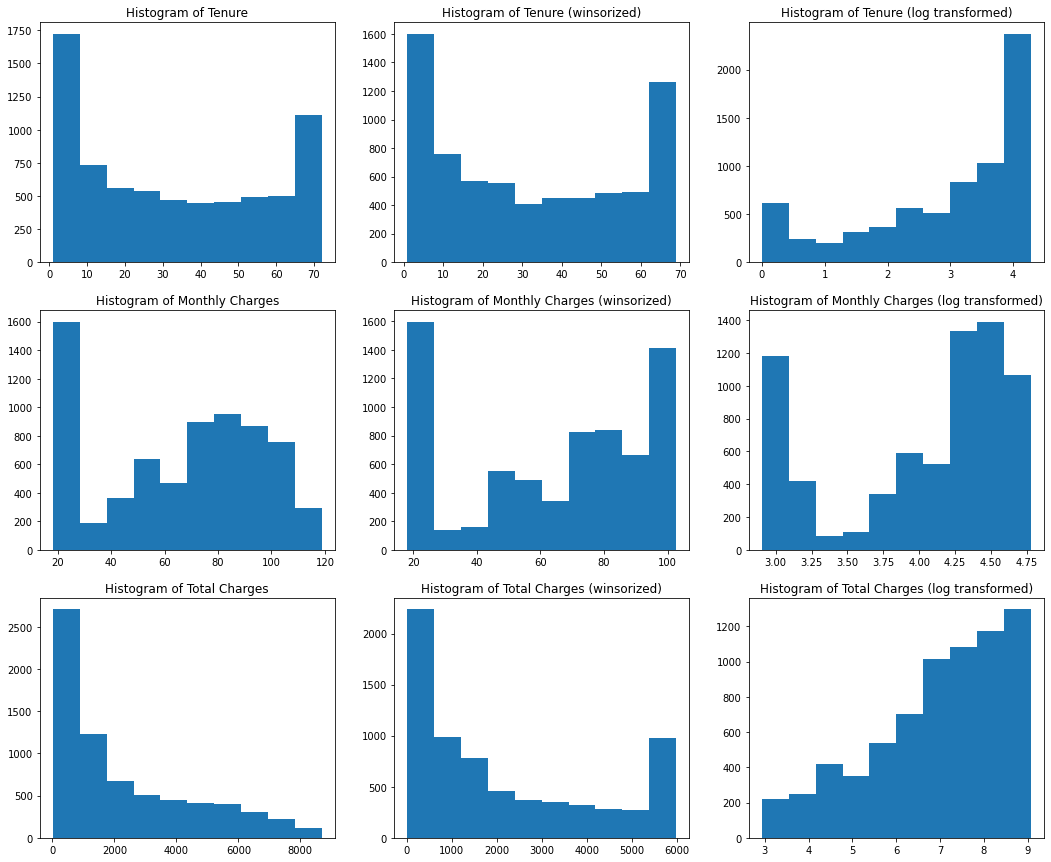

In [14]:
plt.figure(figsize=(18,15))

plt.subplot(3,3,1)
plt.hist(capstone2["tenure"])
plt.title("Histogram of Tenure")

plt.subplot(3, 3, 2)
plt.hist(capstone2["winsorized_tenure"])
plt.title("Histogram of Tenure (winsorized)")

plt.subplot(3,3,3)
plt.hist(np.log(capstone2["tenure"]))
plt.title("Histogram of Tenure (log transformed)")


plt.subplot(3,3,4)
plt.hist(capstone2["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")

plt.subplot(3, 3, 5)
plt.hist(capstone2["winsorized_MonthlyCharges"])
plt.title("Histogram of Monthly Charges (winsorized)")

plt.subplot(3,3,6)
plt.hist(np.log(capstone2["MonthlyCharges"]))
plt.title("Histogram of Monthly Charges (log transformed)")

plt.subplot(3,3,7)
plt.hist(capstone2["TotalCharges"])
plt.title("Histogram of Total Charges")

plt.subplot(3, 3, 8)
plt.hist(capstone2["winsorized_TotalCharges"])
plt.title("Histogram of Total Charges (winsorized)")

plt.subplot(3,3,9)
plt.hist(np.log(capstone2["TotalCharges"]))
plt.title("Histogram of Total Charges (log transformed)")

plt.show()



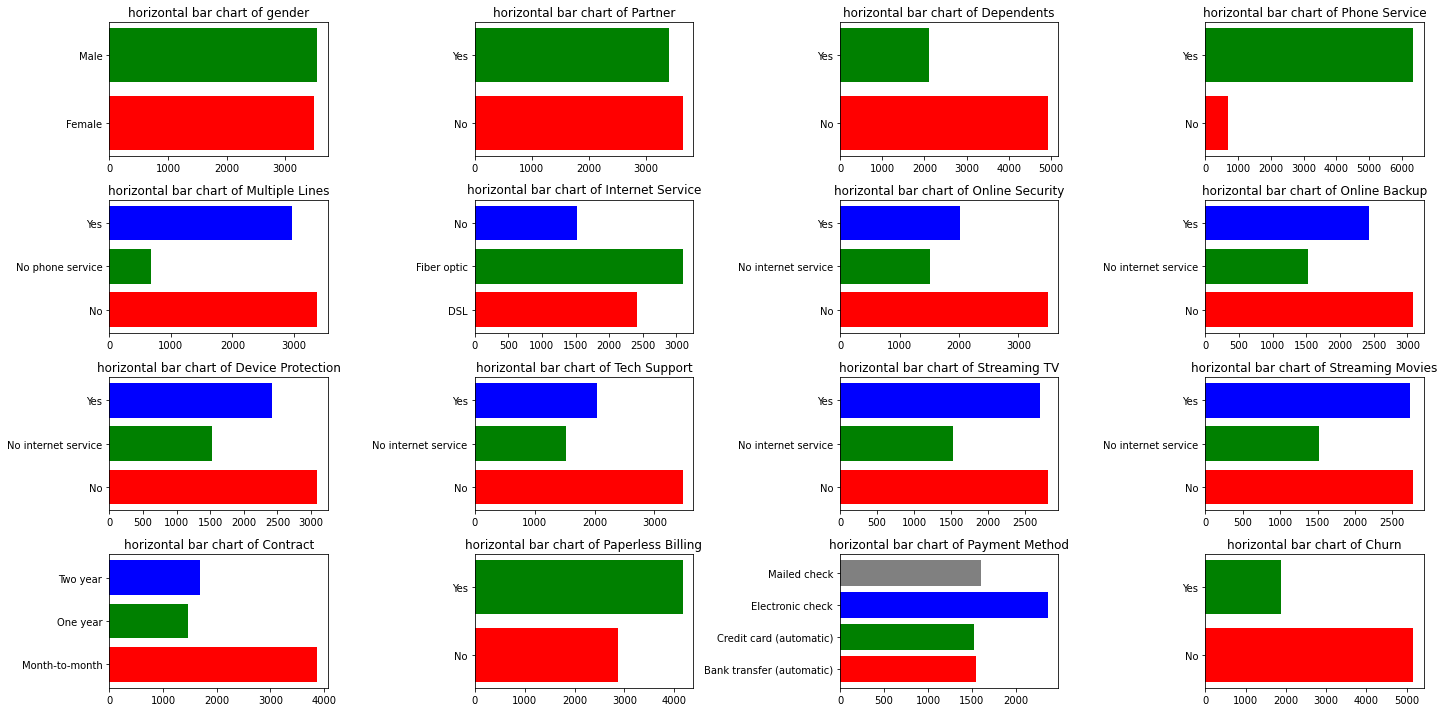

In [15]:
plt.figure(figsize=(20,10))

plt.subplot(4,4,1)
plt.barh(capstone2.groupby("gender")["gender"].count().index, 
        capstone2.groupby("gender")["gender"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of gender")

plt.subplot(4,4,2)
plt.barh(capstone2.groupby("Partner")["Partner"].count().index, 
        capstone2.groupby("Partner")["Partner"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of Partner")

plt.subplot(4,4,3)
plt.barh(capstone2.groupby("Dependents")["Dependents"].count().index, 
        capstone2.groupby("Dependents")["Dependents"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of Dependents")

plt.subplot(4,4,4)
plt.barh(capstone2.groupby("PhoneService")["PhoneService"].count().index, 
        capstone2.groupby("PhoneService")["PhoneService"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of Phone Service")

plt.subplot(4,4,5)
plt.barh(capstone2.groupby("MultipleLines")["MultipleLines"].count().index, 
        capstone2.groupby("MultipleLines")["MultipleLines"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of Multiple Lines")

plt.subplot(4,4,6)
plt.barh(capstone2.groupby("InternetService")["InternetService"].count().index, 
        capstone2.groupby("InternetService")["InternetService"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of Internet Service")

plt.subplot(4,4,7)
plt.barh(capstone2.groupby("OnlineSecurity")["OnlineSecurity"].count().index, 
        capstone2.groupby("OnlineSecurity")["OnlineSecurity"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of Online Security")

plt.subplot(4,4,8)
plt.barh(capstone2.groupby("OnlineBackup")["OnlineBackup"].count().index, 
        capstone2.groupby("OnlineBackup")["OnlineBackup"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of Online Backup")

plt.subplot(4,4,9)
plt.barh(capstone2.groupby("DeviceProtection")["DeviceProtection"].count().index, 
        capstone2.groupby("DeviceProtection")["DeviceProtection"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of Device Protection")

plt.subplot(4,4,10)
plt.barh(capstone2.groupby("TechSupport")["TechSupport"].count().index, 
        capstone2.groupby("TechSupport")["TechSupport"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of Tech Support")

plt.subplot(4,4,11)
plt.barh(capstone2.groupby("StreamingTV")["StreamingTV"].count().index, 
        capstone2.groupby("StreamingTV")["StreamingTV"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of Streaming TV")

plt.subplot(4,4,12)
plt.barh(capstone2.groupby("StreamingMovies")["StreamingMovies"].count().index, 
        capstone2.groupby("StreamingMovies")["StreamingMovies"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of Streaming Movies")

plt.subplot(4,4,13)
plt.barh(capstone2.groupby("Contract")["Contract"].count().index, 
        capstone2.groupby("Contract")["Contract"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of Contract")

plt.subplot(4,4,14)
plt.barh(capstone2.groupby("PaperlessBilling")["PaperlessBilling"].count().index, 
        capstone2.groupby("PaperlessBilling")["PaperlessBilling"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of Paperless Billing")

plt.subplot(4,4,15)
plt.barh(capstone2.groupby("PaymentMethod")["PaymentMethod"].count().index, 
        capstone2.groupby("PaymentMethod")["PaymentMethod"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of Payment Method")

plt.subplot(4,4,16)
plt.barh(capstone2.groupby("Churn")["Churn"].count().index, 
        capstone2.groupby("Churn")["Churn"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of Churn")

plt.tight_layout()
plt.show()

#**Feature Engineering I**

In order to use this dataset in a classification supervised learning model, I must convert the categorical features into dummies. I proceed to do that for 15 features and the target variable, which is Churn.

I also drop the winsorized features I used in my analysis from before, as well as all of the original categorical features and target variable, for a cleaner dataset. I also remove the customerID feature since it brings no value to our models.

In [16]:
capstone2a = pd.concat([capstone2, pd.get_dummies(capstone2[["gender", "Partner", "Dependents", "PaperlessBilling", "Churn"]], 
                                    drop_first=True, prefix=["gender", "Partner", "Dependents", "PaperlessBilling", "Churn"])], axis=1)

capstone2b = pd.concat([capstone2a, pd.get_dummies(capstone2a[["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]],
                                            prefix=["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"])], axis=1)
capstone2b

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,winsorized_tenure,winsorized_MonthlyCharges,winsorized_TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes,Churn_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,29.85,29.85,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,34,56.95,1889.50,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2,53.85,108.15,1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,45,42.30,1840.75,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2,70.70,151.65,0,0,0,1,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,24,84.80,1990.50,1,1,1,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,69,102.65,5976.90,0,1,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,11,29.60,346.45,0,1,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,4,74.40,306.60,1,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [17]:
capstone2b.drop(["winsorized_tenure", "winsorized_MonthlyCharges", "winsorized_TotalCharges","customerID", "gender", "Partner",
                 "Dependents", "PaperlessBilling", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", 
                 "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod", "Churn"], axis = 1, inplace = True)

In [18]:
capstone2b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   gender_Male                              7032 non-null   uint8  
 5   Partner_Yes                              7032 non-null   uint8  
 6   Dependents_Yes                           7032 non-null   uint8  
 7   PaperlessBilling_Yes                     7032 non-null   uint8  
 8   Churn_Yes                                7032 non-null   uint8  
 9   PhoneService_No                          7032 non-null   uint8  
 10  PhoneService_Yes                         7032 no

# **Classification Model Building**

For all models I am using a 20/80 test/train split.

Random_state set to 1.

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm, tree, ensemble
from IPython.display import Image
import pydotplus
import graphviz
import itertools
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA


X = capstone2b.drop(["Churn_Yes"], axis=1)
y = capstone2b["Churn_Yes"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#**Logistic Regression**

Logistic regression results

With the SAG solver at L2 penalty.

The Macro average of the model is 73% while the Weighted average is 78%.

In [20]:
lr = LogisticRegression(solver='sag', penalty='l2', max_iter=1000)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

y_pred = lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


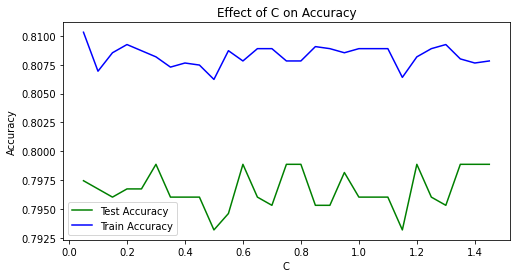

In [21]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=1000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [22]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[928 113]
 [180 186]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1041
           1       0.62      0.51      0.56       366

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



#**KNN**

KNN results

KNN model with n_neighbors set to 8

The Macro average of the model is 73% and the Weighted average is 77%.

In [62]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[914 127]
 [200 166]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1041
           1       0.57      0.45      0.50       366

    accuracy                           0.77      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.77      0.76      1407



In [65]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

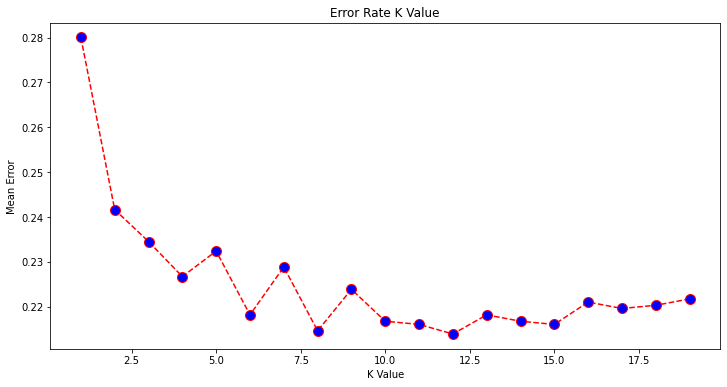

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Reapply model using K value error rate closest to zero.

In [67]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[966  75]
 [227 139]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1041
           1       0.65      0.38      0.48       366

    accuracy                           0.79      1407
   macro avg       0.73      0.65      0.67      1407
weighted avg       0.77      0.79      0.76      1407



#**SVM**

SVM results

SVM model with kernel set to linear

The Macro average of the model is 72% and the Weighted average is 77%.

The runtime for this model is between 9-12 minutes.

In [27]:
clf = svm.SVC(kernel = "linear")

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [28]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[960  81]
 [224 142]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1041
           1       0.64      0.39      0.48       366

    accuracy                           0.78      1407
   macro avg       0.72      0.66      0.67      1407
weighted avg       0.77      0.78      0.76      1407



#**Decision Tree**

Decision Tree results

Criterion set to entropy, with max_features and max_depth set to 5

The Macro average of the model is 74% and the Weighted average is 80%.

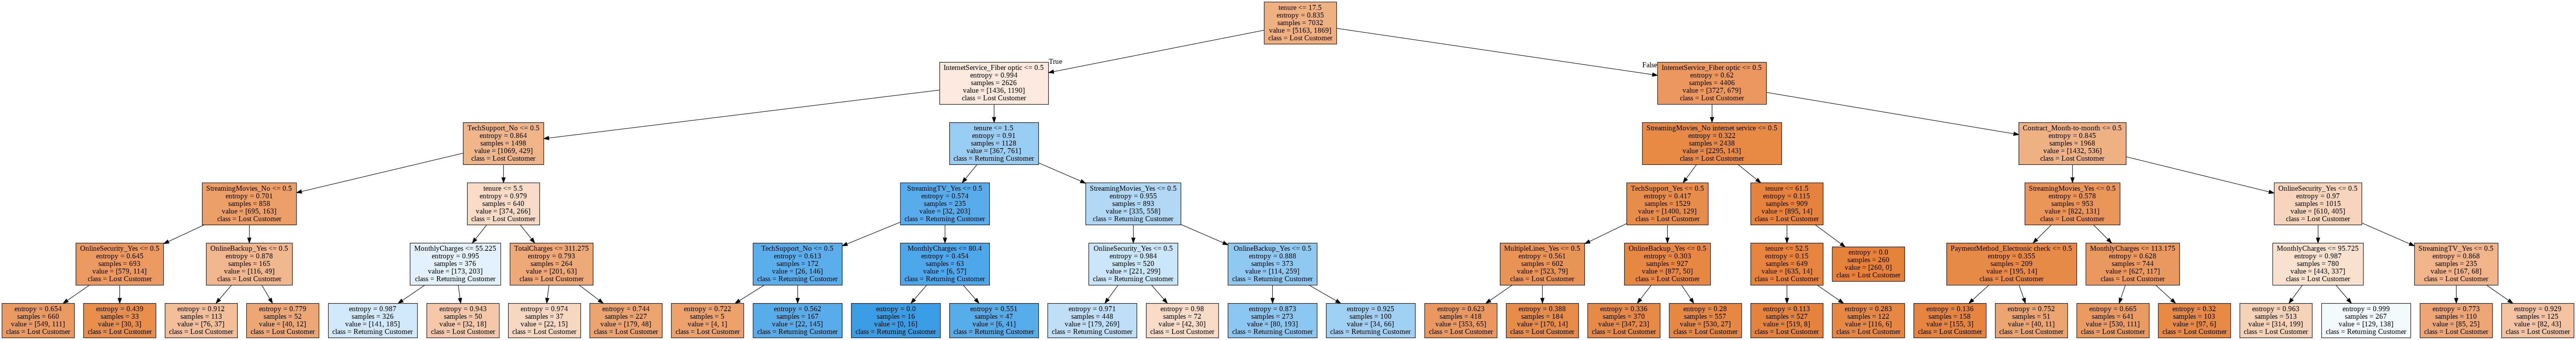

In [68]:
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=5,
    max_depth=5,
    
)
decision_tree.fit(X, y)

dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Lost Customer', 'Returning Customer'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [69]:
y_pred = decision_tree.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[919 122]
 [157 209]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1041
           1       0.63      0.57      0.60       366

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.80      0.80      0.80      1407



#**Random Forest**

Random Forest results

Random Forest model with n_estimators set to 1000

The Macro average of the model is 73% and the Weighted average is 78%.

In [70]:
rfc = RandomForestClassifier(n_estimators=1000)

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[932 109]
 [185 181]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1041
           1       0.62      0.49      0.55       366

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



#**Gradient Boosting**

Gradient Boosting results

Gradient Boosting model with n_estimators set to 1000, max_depth set to 5, loss set to deviance.

The Macro average of the model is 70% and the Weighted average is 76%.


In [73]:
params = {'n_estimators': 1000,
          'max_depth': 5,
          'loss': 'deviance'}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

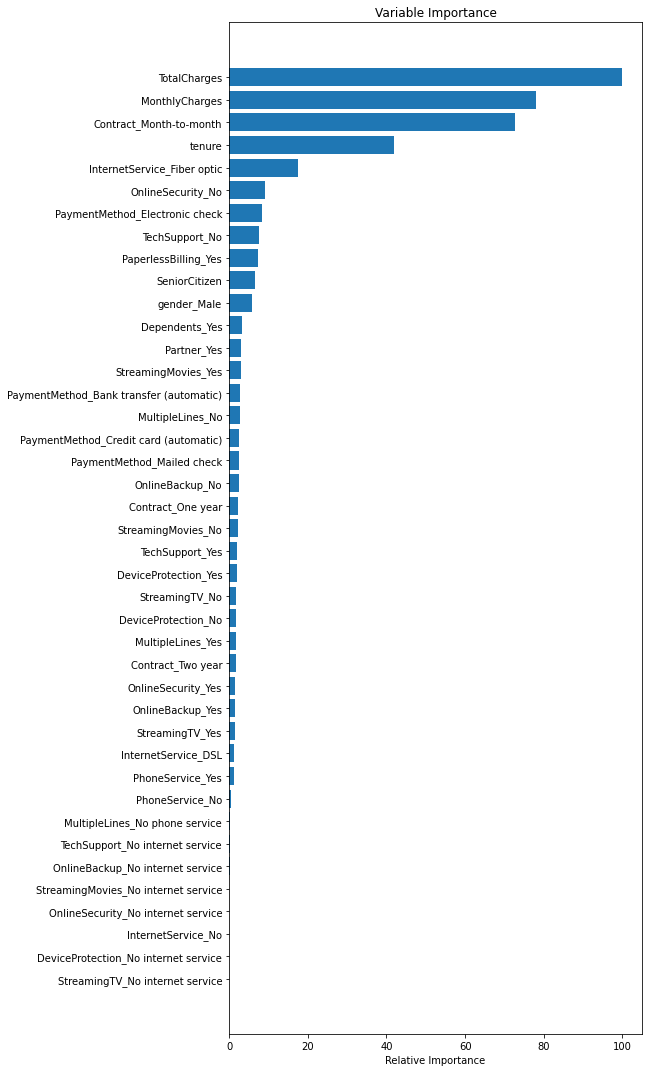

In [74]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

figure(figsize=(15,15))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.tight_layout()
plt.show()

In [75]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[917 124]
 [194 172]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1041
           1       0.58      0.47      0.52       366

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.77      1407



#**Apply PCA to training data**

10 components selected with 25% information loss.

In [76]:
X = capstone2b.drop(["Churn_Yes"], axis=1).values
# Separating out the target
y = capstone2b["Churn_Yes"].values
# Standardizing the features
X = StandardScaler().fit_transform(X)


In [77]:
X.shape
np.mean(X),np.std(X)

(-2.9327459680988626e-18, 1.0)

In [78]:
pca = PCA(n_components=10)
test = pca.fit_transform(X)

In [79]:
test1 = pd.DataFrame(data = test
                      , columns = ['principal component 1', 'principal component 2', 'principal componen 3'
                      , 'principal componen 4', 'principal componen 5', 'principal componen 6', 'principal componen 7'
                      , 'principal componen 8', 'principal componen 9', 'principal componen 10'])

In [80]:
test1.tail()

,principal component 1,principal component 2,principal componen 3,principal componen 4,principal componen 5,principal componen 6,principal componen 7,principal componen 8,principal componen 9,principal componen 10
7027,-1.257088,2.613675,1.079294,-0.794550,2.454247,1.379401,1.438120,0.689597,0.705774,2.115620
7028,-2.408698,4.000094,-1.463984,1.033799,-0.496758,-1.472074,2.217001,1.765596,-1.286914,-0.627982
7029,-1.677607,-3.251194,5.162423,1.312706,-1.633563,1.111563,1.193197,-0.311696,-1.215254,1.620712
7030,-1.816248,-2.984540,-1.575680,-0.259488,-1.874059,0.809584,-0.008305,0.404352,0.455528,0.249378
7031,-1.729276,3.714261,-0.447303,-0.597185,2.433944,1.706187,-0.763965,-1.083875,1.738709,-0.815302


In [81]:
pca.explained_variance_ratio_

array([0.27207866, 0.14080843, 0.10123305, 0.05657265, 0.04085343,
       0.03363927, 0.0322817 , 0.03140673, 0.03074533, 0.02912783])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.27207866 0.14080843 0.10123305 0.05657265 0.04085343 0.03363927
 0.0322817  0.03140673 0.03074533 0.02912783]


#**Logistic Regression after PCA**

Logistic regression results

With the SAG solver at L2 penalty.

The Macro average of the model is 74% while the Weighted average is 79%.

In [83]:
X = capstone2b.drop(["Churn_Yes"], axis=1)
y = capstone2b["Churn_Yes"].values


In [84]:
lr = LogisticRegression(solver='sag', penalty='l2', max_iter=1000)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

y_pred = lr.predict(X_test)

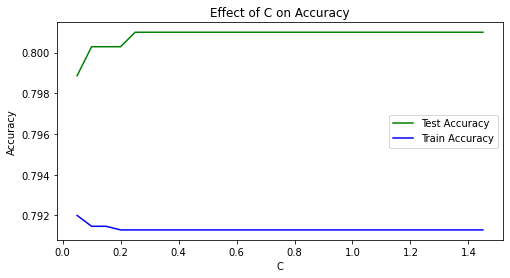

In [85]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='sag', penalty='l2', C=c, max_iter=1000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [86]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[934 107]
 [173 193]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.53      0.58       366

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



#**KNN after PCA**

KNN results

KNN model with n_neighbors set to 17

The Macro average of the model is 73% and the Weighted average is 78%.

In [87]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[885 156]
 [182 184]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1041
           1       0.54      0.50      0.52       366

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.68      1407
weighted avg       0.75      0.76      0.76      1407



In [91]:
error = []


for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

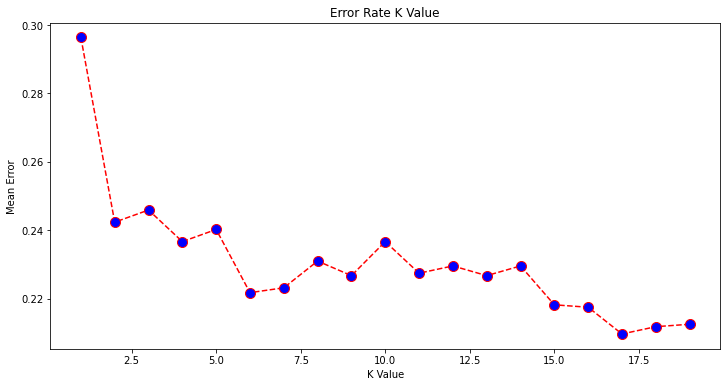

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [93]:
classifier = KNeighborsClassifier(n_neighbors=17)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[917 124]
 [171 195]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1041
           1       0.61      0.53      0.57       366

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



#**SVM after PCA**

SVM results

SVM model with kernel set to linear

The Macro average of the model is 74% and the Weighted average is 79%.

The runtime for this model is 1-3 seconds.


In [94]:
clf = svm.SVC(kernel = "linear")

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [95]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[922 119]
 [163 203]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1041
           1       0.63      0.55      0.59       366

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



#**Decision Tree after PCA**

Decision Tree results

Criterion set to entropy, with max_features and max_depth set to 5

Unable to test for confusion matrix nor classification report.

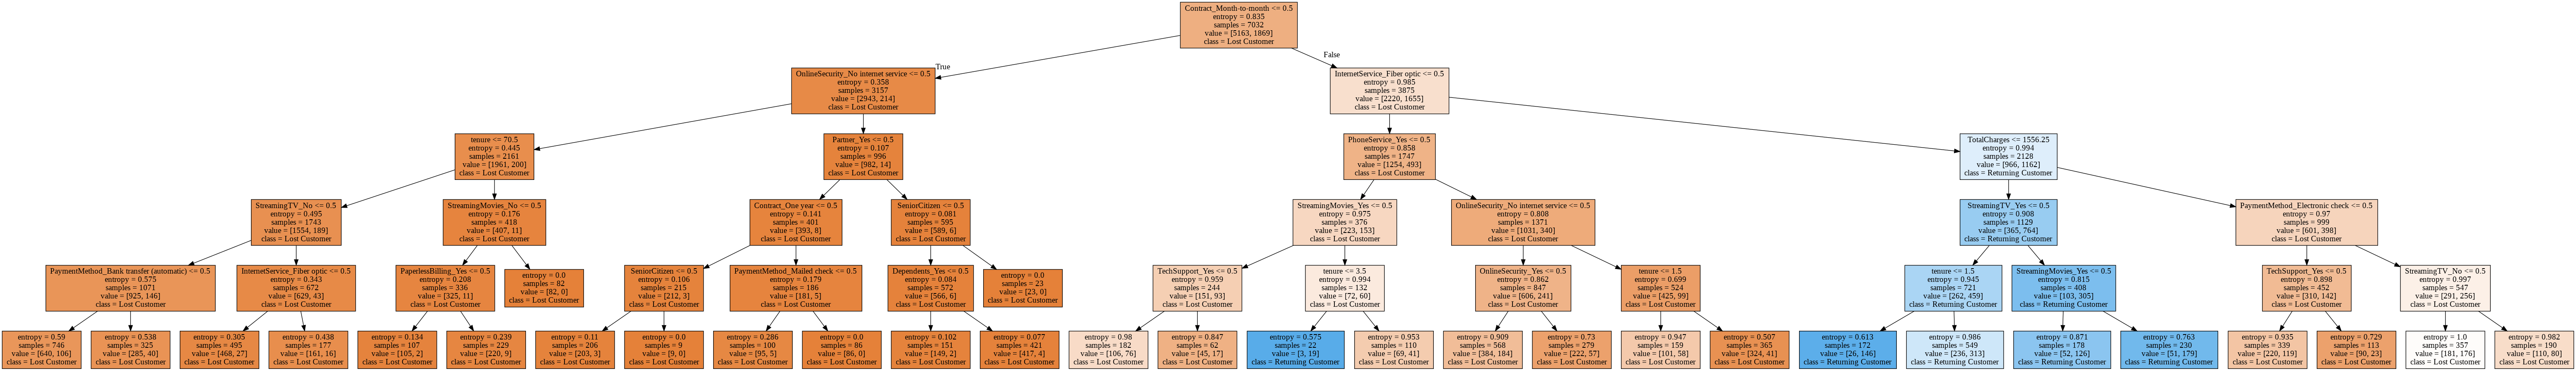

In [96]:
X = capstone2b.drop(["Churn_Yes"], axis=1)
y = capstone2b["Churn_Yes"].values

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=5,
    max_depth=5,
    
)
decision_tree.fit(X, y)

dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Lost Customer', 'Returning Customer'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [97]:
#y_pred = decision_tree.predict(X_test)

#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))


ValueError: ignored

#**Random Forest after PCA**

Random Forest results

Random Forest model with n_estimators set to 1000

The Macro average of the model is 69% and the Weighted average is 75%.

Runtime of this model is about 2 minute

In [98]:
rfc = RandomForestClassifier(n_estimators=1000)

rfc.fit(X_train, y_train)
cross_val_score(rfc, X, y, cv=10)

array([0.79545455, 0.80965909, 0.79516358, 0.79231863, 0.77524893,
       0.75248933, 0.81223329, 0.79089616, 0.80227596, 0.79943101])

In [56]:
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[921 120]
 [208 158]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1041
           1       0.57      0.43      0.49       366

    accuracy                           0.77      1407
   macro avg       0.69      0.66      0.67      1407
weighted avg       0.75      0.77      0.76      1407



#**Gradient Boosting after PCA**

Gradient Boosting results

Gradient Boosting model with n_estimators set to 1000, max_depth set to 5, loss set to deviance.

The Macro average of the model is 69% and the Weighted average is 75%.

In [99]:
params = {'n_estimators': 1000,
          'max_depth': 5,
          'loss': 'deviance'}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

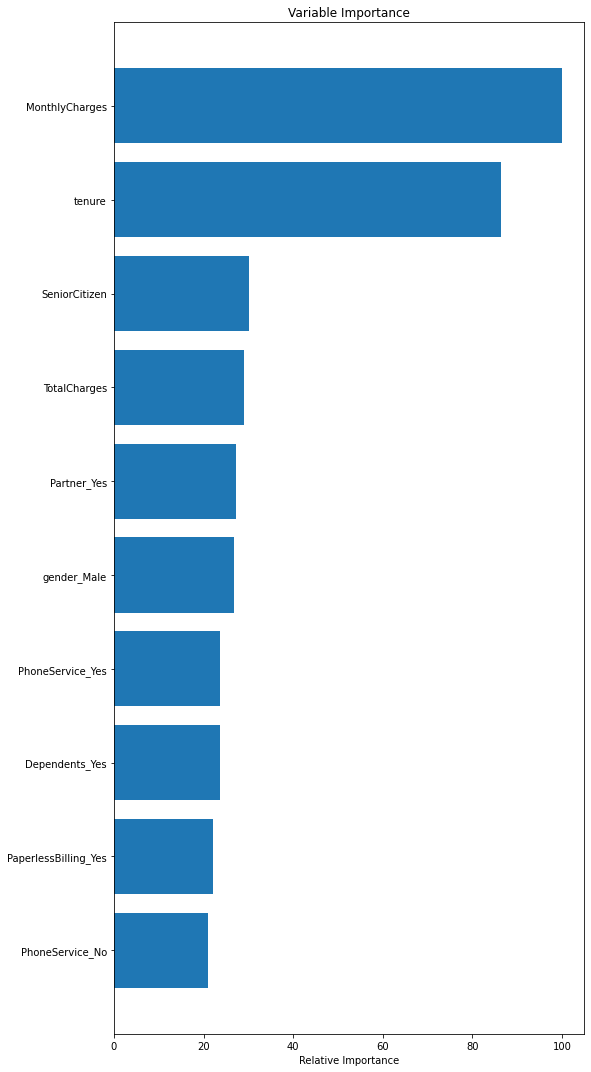

In [100]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

figure(figsize=(15,15))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.tight_layout()
plt.show()

In [101]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[896 145]
 [191 175]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1041
           1       0.55      0.48      0.51       366

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.76      1407



#**Summary**

This data set contains 1 target variable and 40 features.  
There are many features however reducing the amount of features down to the top 10 leads to a loss of about 25% information.  Across all models this leads to a drop of about 3-5% in model accuracy. 

It would be best to increase the amount of features during PCA or target the variance window to something more desireable.

In it's current state, the Decision Tree provides the most acurate model, before PCA.

